In [1]:
using EAMC

┌ Info: Precompiling EAMC [d0d32b4c-83b1-4490-9109-c03fdd3b1e42]
└ @ Base loading.jl:1273


In [39]:
using Distributions

# simulate a single trajectory given rates and and their switching times
function gillespie(qs, qts, x0, tmax)
    # begin if first frame
    i = 1
    t = qts[i]
    q = qs[i]
    x = x0
    xs = [x]
    ts = Float64[t]
    while t < tmax
        qout = -q[x,x]
        dt = rand(Distributions.Exponential(qout))
        if (i+1 < length(qts)) && (dt + t > qts[i+1])
            i += 1
            q = qs[i]
            t = qts[i]
        else
            x = drawnext(q, x)
            t = t + dt
            push!(xs, x)
            push!(ts, t)
        end
    end
    return ts, xs
end

function drawnext(q, x)
    qq = q[x, :]
    qq[x] = 0
    qq ./= sum(qq)
    rand(Categorical(qq))
end

drawnext (generic function with 1 method)

In [40]:
using LinearAlgebra
q = rand(3,3)
q -= Diagonal(q)
q -= Diagonal(sum(q, dims=2) |> vec)

3×3 Array{Float64,2}:
 -0.866591   0.204407   0.662184
  0.869798  -1.74841    0.87861 
  0.322061   0.75685   -1.07891 

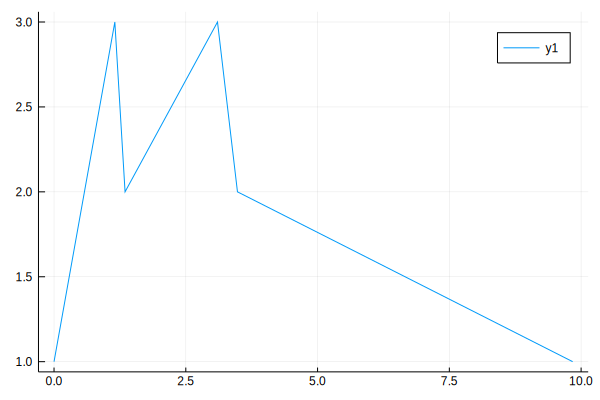

In [47]:
using Plots
ts, xs = gillespie([q,q,q], [0,1,2], 1, 5)
plot(ts, xs)
